# Week 6 Activity

In [11]:
# Setup
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

## Exercise 1


In [3]:
image = cv.imread('boat.jpg')
original = image.copy()

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]

# Generate variables
x1,y1,w,h = cv.boundingRect(thresh)
x2 = x1+w
y2 = y1+h

# Draw bounding rectangle
start = (x1, y1)
end = (x2, y2)
rectangle_img = cv.rectangle(image, start, end, (0, 0, 255), 2)

cv.imshow('boat', image)
cv.imshow('thres', thresh)
cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 2

In [4]:
img = cv.imread('leaf.jfif', 0)

blur = cv.GaussianBlur(img, (5, 5), 0)
_, img_binary = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

#Trackbar function
def trackbar(x):
    
    # define the kernel
    kernel = np.ones((x, x), np.uint8)
 
    # erosion
    e_img = cv.erode(img_binary, kernel, iterations=1)
    
    # dilation
    d_img = cv.dilate(img_binary, kernel, iterations=1)
    
    # opening
    o_img = cv.morphologyEx(img_binary, cv.MORPH_OPEN, kernel, iterations=1)
    
    # closing
    c_img = cv.morphologyEx(img_binary, cv.MORPH_CLOSE, kernel, iterations=1)
    
    cv.imshow('window', np.vstack([e_img, d_img, o_img, c_img]))

cv.namedWindow('window')
cv.createTrackbar('kernel', 'window', 5, 100, trackbar)

## Exercise 3

In [5]:
import glob
from matplotlib.colors import hsv_to_rgb

porcelains_list = []
results = []

#blue_low = (50, 10, 0)
#blue_high = (170, 150, 255)

blue_low = (40, 0, 0)
blue_high = (170, 150, 255)

for filename in glob.glob('porcelain/*.jfif'): 
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    mask = cv.inRange(img_hsv, blue_low, blue_high)
    res = cv.bitwise_and(img, img, mask = mask)
    porcelains_list.append(img)
    results.append(res)

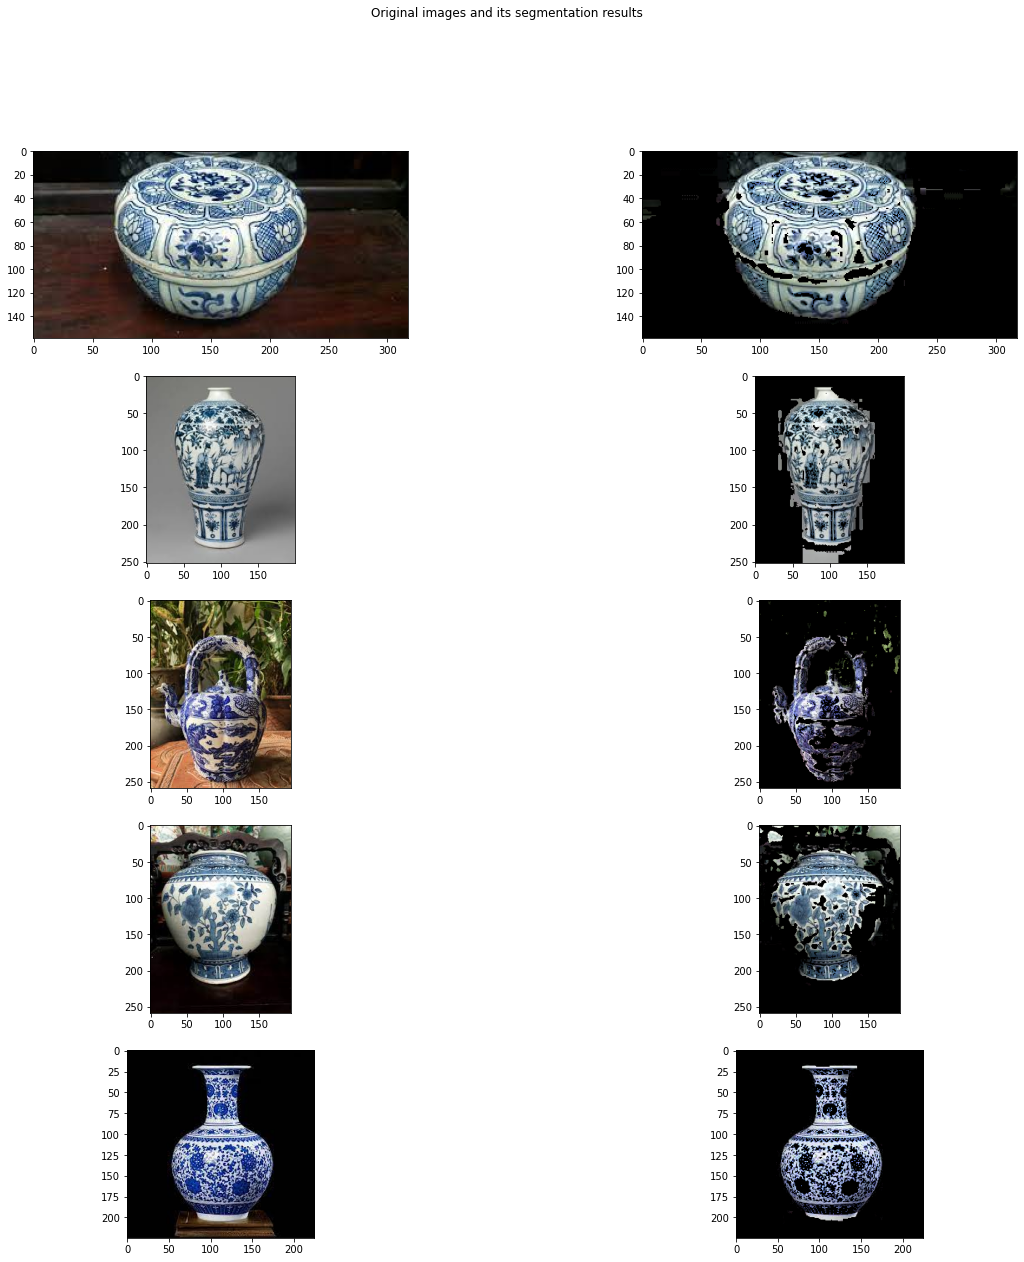

In [10]:
f, ax = plt.subplots(5, 2, figsize = (20, 20))

for i in range(5):
    
    ax[i][0].imshow(porcelains_list[i], cmap='gray')
    ax[i][1].imshow(results[i], cmap='gray')

f.suptitle('Original images and its segmentation results')
plt.show()
